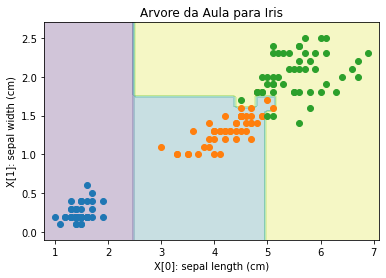

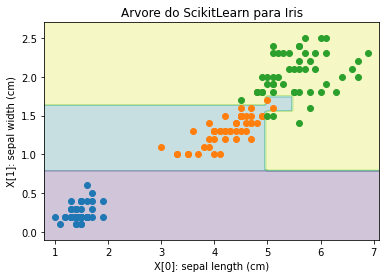

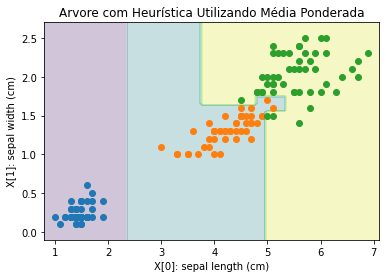

=================== Precisão para Base iris
Para a arvore dada em aula: 0.9533333333333334
Para a arvore do scikitlearn: 0.9600000000000002
Para a arvore com media ponderada: 0.96
=================== Precisão para Base Immunotherapy Dataset
Para a arvore dada em aula: 0.7222222222222221
Para a arvore do scikitlearn: 0.8111111111111111
Para a arvore com media ponderada: 0.6777777777777777
=================== Precisão para Base Cervical Cancer Behavior Risk Data Set
Para a arvore dada em aula: 0.821904761904762
Para a arvore do scikitlearn: 0.8485714285714285
Para a arvore com media ponderada: 0.7638095238095237
=================== Precisão para Base Breast Cancer Coimbra Data Set
Para a arvore dada em aula: 0.6561594202898551
Para a arvore do scikitlearn: 0.6217391304347826
Para a arvore com media ponderada: 0.6115942028985507


In [11]:
# DESCRIÇÃO DO EXERCÍCIO 05

# Aluno: Wekler Mendes Sarmento

# Crie a sua heurística para escolher a melhor característica para um nó de uma árvore de decisão e compare com a implementação feita nos vídeos postados nesse tópico aqui no AVA e com a implementação do scikit learn.

# Faça comparações plotando as regiões de decisão com resubstituição para a base iris e as características usadas nos vídeos.

# Também faça comparações usando validação cruzada com pelo menos 3 bases de classificação com atributos contínuos.

# Escreva um parágrafo expondo sua interpretação dos resultados obtidos.

###############################
# DEPENDÊNCIAS
###############################
from sklearn.metrics import accuracy_score # Para cáulculo de precisão
import numpy as np # Para conversões e médias
from collections import Counter # Para contagem de repetições
from sklearn.base import BaseEstimator, ClassifierMixin # Para ser aceito no CrossValidate
from sklearn.datasets import load_iris # Carregar o Iris dataset
import matplotlib.pyplot as plt # Para plotagem dos gráficos
from sklearn.tree import DecisionTreeClassifier # Utilizar a árvore já pronta do Scikitlearn
import pandas as pd # Importando a dependêcia para leitura do csv


###########################################################
#Bases Utilizadas
###########################################################

def SelecionaBase(numero):
    if int(numero) == 0: #Iris data set        
        iris = load_iris()
        X, y = iris.data[:,2:], iris.target
        nome_base = str("iris")

    if int(numero) == 1: #Primeira base para teste da validação cruzada
        # Nome: Immunotherapy Dataset
        # Descrição da base de dados: https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset
        # Link direto para download da base de dados: https://archive.ics.uci.edu/ml/machine-learning-databases/00428/Immunotherapy.xlsx
        # Nome do arquivo descompactado e utilizado como base de dados: Immunotherapy.xlsx ou direto da internet   
        #==============================================================================================================================================================

        todos_dados = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00428/Immunotherapy.xlsx') # Lendo o arquivo zip direto da internet

        #==============================================================================================================================================================
        # Separando os dados X e y
        #==============================================================================================================================================================
        X, y = todos_dados.drop('Result_of_Treatment', axis=1), todos_dados['Result_of_Treatment']

        X = X.to_numpy() # Transformando para array
        y = y.to_numpy() # Transformando para array
        nome_base = str("Immunotherapy Dataset")
    
    if int(numero) == 2: #Segunda base para teste da validação cruzada
        # Nome: Cervical Cancer Behavior Risk Data Set
        # Descrição da base de dados: https://archive.ics.uci.edu/ml/datasets/Cervical+Cancer+Behavior+Risk#
        # Link direto para download da base de dados: https://archive.ics.uci.edu/ml/machine-learning-databases/00537/sobar-72.csv
        # Nome do arquivo descompactado e utilizado como base de dados: sobar-72.csv   
        #==============================================================================================================================================================

        #todos_dados = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00428/Immunotherapy.xlsx') # Lendo o arquivo zip direto da internet
        todos_dados = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00537/sobar-72.csv')

        #==============================================================================================================================================================
        # Separando os dados X e y
        #==============================================================================================================================================================
        X, y = todos_dados.drop('ca_cervix', axis=1), todos_dados['ca_cervix']

        X = X.to_numpy() # Transformando para array
        y = y.to_numpy() # Transformando para array
        nome_base = str("Cervical Cancer Behavior Risk Data Set")

    if int(numero) == 3: #Terceira base para teste da validação cruzada
        # Nome: Breast Cancer Coimbra Data Set
        # Descrição da base de dados: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra#
        # Link direto para download da base de dados: https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.xlsx
        # Nome do arquivo descompactado e utilizado como base de dados: dataR2.xlsx ou direto da internet   
        #==============================================================================================================================================================

        todos_dados = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.xlsx') # Lendo o arquivo zip direto da internet

        #==============================================================================================================================================================
        # Separando os dados X e y
        #==============================================================================================================================================================
        X, y = todos_dados.drop('Classification', axis=1), todos_dados['Classification']

        X = X.to_numpy() # Transformando para array
        y = y.to_numpy() # Transformando para array
        nome_base = str("Breast Cancer Coimbra Data Set")

    return X, y, nome_base

###########################################################
#Funções Utilizadas por todas as árvores
###########################################################

def maisFrequente_Aula(y): # Utilizado para contar a frequência de repetção dos valores de uma característica (Retirado da aula)
    return Counter(y.flat).most_common(1)[0][0]

def impureza_Aula(y): #Gini # (Retirado da aula)
    labels = list(set(y))
    labels.sort()
    probabilidades = np.zeros((len(labels),))
    for i,k in enumerate(labels):
        probabilidades[i] = sum(y==k)/len(y)
    result = 1 - sum(probabilidades**2)
    return result


def impurezaValor_Aula(x, y, valor): # (Retirado da aula)
    maiores = x>valor
    impurezaMaiores = impureza_Aula(y[maiores])
    propMaiores = sum(maiores)/len(y)
    impurezaMenores = impureza_Aula(y[~maiores])
    propMenores = sum(~maiores)/len(y)
    impurezaTotal = propMaiores*impurezaMaiores + propMenores*impurezaMenores
    return impurezaTotal, impurezaMaiores, impurezaMenores

###############################################################################
#Plotagem das características (Retirado da aula porém com algumas modificações)
###############################################################################
def plotDecisao_Aula(modelo, X, y, DataSet, titulo): # Acrescentado a variável DataSet para indicar qual será plotado
    modelo.fit(X, y)
    x0s = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 100) # Configurando os limites
    x1s = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    Xdec = np.c_[x0.ravel(), x1.ravel()] # Variável que vai gerar a região de decisão
    ypred = modelo.predict(Xdec)
    plt.contourf(x0, x1, ypred.reshape(x0.shape), alpha=0.25) # Fazendo o contorno
    plt.title(titulo) # Colocando o título para facilitar a identificação
    for k in set(y): #Para visualizar as amostras no gráfico
        plt.plot(X[:,0][y==k], X[:,1][y==k], 'o', label=f"{DataSet.target_names[k]} [{k}]") # Plotas todos os valores de X das características 1 e 0 onde o y é igual ao k, representador por bolinha ('o') e colocando uma legenda igual ao nome dentro do data set
    plt.xlabel(f"X[0]: {DataSet.feature_names[0]}")
    plt.ylabel(f"X[1]: {DataSet.feature_names[1]}")
    plt.show()


def plotDecisao_Aula(modelo, X, y, DataSet, titulo): # Acrescentado a variável DataSet para indicar qual será plotado
    modelo.fit(X, y)
    x0s = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 100) # Configurando os limites
    x1s = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    Xdec = np.c_[x0.ravel(), x1.ravel()] # Variável que vai gerar a região de decisão
    ypred = modelo.predict(Xdec)
    plt.contourf(x0, x1, ypred.reshape(x0.shape), alpha=0.25) # Fazendo o contorno
    plt.title(titulo) # Colocando o título para facilitar a identificação
    for k in set(y): #Para visualizar as amostras no gráfico
        plt.plot(X[:,0][y==k], X[:,1][y==k], 'o', label=f"{DataSet.target_names[k]} [{k}]") # Plotas todos os valores de X das características 1 e 0 onde o y é igual ao k, representador por bolinha ('o') e colocando uma legenda igual ao nome dentro do data set
    plt.xlabel(f"X[0]: {DataSet.feature_names[0]}")
    plt.ylabel(f"X[1]: {DataSet.feature_names[1]}")
    plt.show()

###########################################################
#Funções Utilizadas pela árvore dada em aula
###########################################################
def melhorValor_Aula(x, y): # Criando uma heurística que decide qual o menor valor de uma característica (Retirado da aula)
    result = None
    menorImpureza = float('inf') # Começa como um flot infinito
    xmax = np.max(x) # Calcula o maior valor dentro da característica selecionada (x)
    xmin = np.min(x) # Calcula o menor valor dentro da característica selecionada (x)
    while True:
        valor = (xmin+xmax)/2 # faz a média aritimética entre o valor maximo e mínimo
        impTotal, impMaiores, impMenores = impurezaValor_Aula(x, y, valor) # Utilizando a função criada para encontrar os resultados das impurezas
        if impTotal < menorImpureza:
            menorImpureza = impTotal # Se impureza total é menor do que a impureza menor encontrada, então essa será a impureza menor
            result = valor
            if impMaiores == 0 or impMenores == 0: # Se a impureza dos maiores ou menores for igual a zero já se tem um ponto ótimo, então já pode parar
                break
            if impMaiores < impMenores: # Se a impureza dos maiores for menor do que o calculo da impureza dos menores
                xmin = valor # Move a média
            else:
                xmax = valor # Move a média
        else:
            break
    return result, menorImpureza

def melhorCaracteristica_Aula(X, y): # Encontrar a melhor característica das encontradas (Retirado da aula)
    impurezas = []
    valores = []
    for caracteristica in range(X.shape[1]):
        valor, imp = melhorValor_Aula(X[:,caracteristica], y) # Utiliza a função anterior
        impurezas.append(imp)
        valores.append(valor)
    impurezas = np.array(impurezas)
    caracteristica = np.argmin(impurezas)
    return caracteristica, valores[caracteristica], impurezas[caracteristica]

#########################################################################
#Funções Utilizadas pela árvore com heurística utilizando média ponderada
#########################################################################
def bestValor(x, y): # Criando uma heurística que decide qual o menor valor de uma característica baseado na média ponderada
    result = None
    menorImpureza = float('inf') 
    
    while True:
        valor = np.average(x) # faz a média ponderada dos valores de x
            
        impTotal, impMaiores, impMenores = impurezaValor_Aula(x, y, valor) # Utilizando a função criada para encontrar os resultados das impurezas        

        if impTotal < menorImpureza:
            menorImpureza = impTotal # Se impureza total é menor do que a impureza menor encontrada, então essa será a impureza menor
            result = valor            
            if impMaiores == 0 or impMenores == 0: # Se a impureza dos maiores ou menores for igual a zero já se tem um ponto ótimo, então já pode parar
                break
            if impMaiores < impMenores: # Se a impureza dos maiores for menor do que o calculo da impureza dos menores
                valor_min = valor # Move a média
            else:
                valor_max = valor # Move a média
        else:
            break

    return result, menorImpureza

def bestCaracteristic(X, y): # Encontrar a melhor característica das encontradas (Reaproveitado apontando apenas para uma nova função)
    impurezas = []
    valores = []
    for caracteristica in range(X.shape[1]):
        valor, imp = bestValor(X[:,caracteristica], y) # Utiliza a função anterior
        impurezas.append(imp)
        valores.append(valor)
    impurezas = np.array(impurezas)
    caracteristica = np.argmin(impurezas)
    return caracteristica, valores[caracteristica], impurezas[caracteristica]

###########################################################
#Implementação da Árvore com a Heurística Utilizada em Aula
###########################################################
class Arvore_Aula(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.caracteristica, self.valor, self.imp = melhorCaracteristica_Aula(X,y) #Descobre a impureza da melhor característica
        maiores = X[:,self.caracteristica] > self.valor
        if sum(maiores)>0 and sum(~maiores)>0:
            self.maiores = Arvore_Aula() # Cria uma arvore para os que são iguais
            self.maiores.fit(X[maiores,:],y[maiores])
            self.menores = Arvore_Aula() # Cria uma arvore para os que são diferentes
            self.menores.fit(X[~maiores,:],y[~maiores])
        else: # Vai cair aqui se todos forem iguais ou todos são diferentes
            self.resposta = maisFrequente_Aula(y)
    def predict(self, X):
        y = np.empty((X.shape[0]))
        if hasattr(self, 'resposta'): # Somente é gerada uma "resposta" quando chega numa folha em que todos são iuguais ou todos são diferentes
            y[:] = self.resposta
        else: # Se não tiver resposta
            maiores = X[:,self.caracteristica] > self.valor
            y[maiores] = self.maiores.predict(X[maiores,:])
            y[~maiores] = self.menores.predict(X[~maiores,:])
        return y


###########################################################
#Implementação da Árvore com a Heurística Própria
###########################################################
class Arvore_Propria(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.caracteristica, self.valor, self.imp = bestCaracteristic(X,y) #Descobre a impureza da melhor característica
        maiores = X[:,self.caracteristica] > self.valor
        if sum(maiores)>0 and sum(~maiores)>0:
            self.maiores = Arvore_Aula() # Cria uma arvore para os que são iguais
            self.maiores.fit(X[maiores,:],y[maiores])
            self.menores = Arvore_Aula() # Cria uma arvore para os que são diferentes
            self.menores.fit(X[~maiores,:],y[~maiores])
        else: # Vai cair aqui se todos forem iguais ou todos são diferentes
            self.resposta = maisFrequente_Aula(y)
    def predict(self, X):
        y = np.empty((X.shape[0]))
        if hasattr(self, 'resposta'): # Somente é gerada uma "resposta" quando chega numa folha em que todos são iuguais ou todos são diferentes
            y[:] = self.resposta
        else: # Se não tiver resposta
            maiores = X[:,self.caracteristica] > self.valor
            y[maiores] = self.maiores.predict(X[maiores,:])
            y[~maiores] = self.menores.predict(X[~maiores,:])
        return y

#######################################################################################
# Resolvendo a primeira parte do exercício - Plotagem dos gráficos para o dataset Iris
#######################################################################################
iris = load_iris()
# Plotando o gráfico utilizando a árvore da aula
X, y, nome = SelecionaBase(0) # Carregando a base iris dataset (0)
plotDecisao_Aula(Arvore_Aula(), X, y, iris, 'Arvore da Aula para Iris') # Informando um parâmetro a mais que é a identificação da base

# Fazendo a mesma coisa porém usando a solução pronta do scikitlearn
X, y, nome = SelecionaBase(0) # Carregando a base iris dataset (0)
plotDecisao_Aula(DecisionTreeClassifier(), X, y, iris, 'Arvore do ScikitLearn para Iris')

# Fazendo a mesma coisa porém usando a árvore com heurística própria
X, y, nome = SelecionaBase(0) # Carregando a base iris dataset (0)
plotDecisao_Aula(Arvore_Propria(), X, y, iris, 'Arvore com Heurística Utilizando Média Ponderada')

################# Scores

for i in range (4):
    X, y, nome_base = SelecionaBase(i)
    print("===================================================================")
    print("=================== Precisão para Base " + nome_base)
    from sklearn.model_selection import cross_validate
    scores = cross_validate(Arvore_Aula(), X, y)
    print("Para a arvore dada em aula:", np.mean(scores['test_score']))

    scores = cross_validate(DecisionTreeClassifier(), X, y)
    print("Para a arvore do scikitlearn:", np.mean(scores['test_score']))

    scores = cross_validate(Arvore_Propria(), X, y)
    print("Para a arvore com media ponderada:", np.mean(scores['test_score']))

    print("===================================================================")

#########################################################################
#############Interpretação dos Resultados Obtidos########################
#########################################################################
# A nova abordagem na heurística implementada buscou mesclar a mesma lógica da heutística apresentada em aula com a média ponderada ao invés da média aritimética. Referente ao data set iris, as regiões de decisões ficaram bem parecidas com um leve ganho na utilização da média ponderada, chegando em 0.96, mas nada significativo em relação as demais árvores. Para as outras bases testadas, a heurística que utilizou a média ponderada teve um desempenho pior que as outras. A árvore do próprio scikitlearn teve um resultado melhor do que as demais. Na lógica da média ponderada, foi utilizada o mesmo peso para todos os valores. Talvez se fosse utilizado uma lógica com aplicação de peso diferentes para os valores pudesse ter um resultado melhor do que o encontrado.